In [26]:
import re

# Peguei do Wikisum: https://github.com/tensorflow/tensor2tensor/blob/master/tensor2tensor/data_generators/wikisum/utils.py
_SOME_ALPHA_RE = re.compile(r'[A-Za-z]+')
_ONLY_ALPHA_RE = re.compile(r'^[A-Za-z]*$')
def filter_paragraph(p):
    """Simple filter to remove obviously bad paragraphs (bad text extraction).
    Note this needs to run very quickly as it is applied to every paragraph
    in the corpus, so nothing fancy! This whole method should be linear
    expected time in len(p).
    Args:
    p: string, paragraph
    Returns:
    True if we should remove the paragraph.
    """
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy .
    p = re.sub(r"([?.!,¿])", r" \1 ", p)
    p = re.sub(r'[" "]+', " ", p)
    # substituir tudo por espaço exceto (a-z, A-Z, ".", "?", "!", ",", letras com acentos da lingua pt)
    p = re.sub(r"[^a-zA-ZçÇéêíáâãõôóúûÉÊÍÁÂÃÕÔÓÚÛ?.!,()0-9]+", " ", p).lower()
    return p


In [27]:
from os import listdir
from os.path import isfile, isdir, join
from codecs import open
import pandas as pd

titles = []
documents = []
summary = []

dir_names = [f for f in listdir('.') if isdir(f)]
for dir_name in dir_names:
    if('C' in dir_name):
        elements = dir_name.split('_')
        code = elements[0]
        theme = elements[1]
        raw_title = elements[2].split(' - ')[0]
        title = theme
        for character in raw_title:
            if(character.isupper()):
                title = title + ' ' + character
            else:
                title = title + character
        titles.append(title)
        documents_path = dir_name + '/Textos-fonte segmentados/'
        documents_file_names =[f for f in listdir(documents_path) if isfile(join(documents_path, f))]
        concatenated_documents = ''
        for file_name in documents_file_names:
            with open(join(documents_path, file_name), 'r') as file:
                concatenated_documents = concatenated_documents + filter_paragraph(file.read())
        documents.append(concatenated_documents)
        summary_path = dir_name + '/Sumarios/'
        with open("{}{}_sumario_humano.txt".format(summary_path, code), 'r', encoding='utf-8', errors='ignore') as file:
            summary.append(filter_paragraph(file.read()))

pd_cstnews = pd.DataFrame({'title' : titles, 'document' : documents, 'summary' : summary})
pd_cstnews


,title,document,summary
0,Ciencia Novo Planeta,"a lista dos chamados exoplanetas , mundos loca...",astrônomos têm denominado objetos menores que ...
1,Política Procurador Renan,"o procurador geral da república , antonio fern...","o presidente do senado , renan calheiros , dis..."
2,Cotidiano Malha Fina,a receita federal intensificou a fiscalização ...,a receita federal intensificou a fiscalização ...
3,Esportes Recorde Thiago,"rio em uma disputa emocionante , o brasil conq...","na sexta feira , o brasil conquistou a medalha..."
4,Esportes Hepta Volei,katowice (polônia) a seleção brasileira de vôl...,a seleção brasileira masculina de vôlei mostro...
5,Mundo Terremoto Japao,"tóquio um terremoto de 6 , 8 graus na escala r...","um terremoto de 6 , 8 graus na escala ritcher ..."
6,Política Renan,brasília a mesa diretora do senado se reuniu n...,os integrantes da mesa diretora do senado deci...
7,Mundo Avião Congo,ao menos 17 pessoas morreram após a queda de u...,17 pessoas morreram após a queda de um avião n...
8,Esportes Maradona,buenos aires maradona voltou a ter problemas d...,maradona voltou a ter problemas de saúde no fi...
9,Esportes Goleada Equador,rio na volta da seleção brasileira ao maracanã...,"após empate decepcionante com a colômbia , o b..."


Distribuição de tokens na entrada


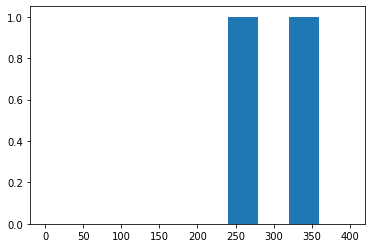

Distribuição de tokens na saida


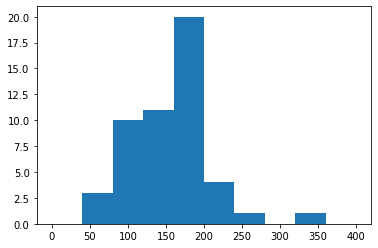

Distribuição de tokens na entrada/statements na saida


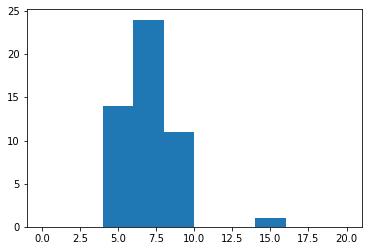

In [30]:
import matplotlib.pyplot as plt

def show_distributions(x, y):
    # Distribuicao do numero de palavras nas avaliacoes e titulos
    print("Distribuição de tokens na entrada")
    plt.hist([len(linha.split()) for linha in x], range=(0, 400))
    plt.show()
    print("Distribuição de tokens na saida")
    plt.hist([len(linha.split()) for linha in y], range=(0, 400))
    plt.show()
    print("Distribuição de tokens na entrada/statements na saida")
    statements = [len(linha.split()) for linha in y]
    tokens = [len(linha.split()) for linha in x]
    plt.hist([float(tokens[i])/statements[i] for i in range(len(x))], range=(0, 20))
    plt.show()

def joint_texts(a, b):
    out = []
    for i in range(len(a)):
        out.append(a[i]+ ' [SEP] ' + b[i])
    return out

x = joint_texts(pd_cstnews['title'], pd_cstnews['document'])
y = pd_cstnews['summary']
show_distributions(x, y)